# Gramener Case Study

In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Cleaning

In [133]:
loan = pd.read_csv("loan.csv")

C:\Users\ArpitSoni\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [134]:
loan.shape

(39717, 111)

#### Removing columns which have all values as ```NaN``` 

In [135]:
# Removing columns which have all values as NaN
loans_frame = loan.dropna(axis=1, how="all")
loans_frame.shape

(39717, 57)

### Fetching ```Data Dictionary```  from file

In [136]:
data_dict = pd.read_excel("Data_Dictionary.xlsx", sheet_name="LoanStats")

#### List of columns for the Data Dictionary

In [137]:
filtered_data_dict = data_dict.loc[data_dict['LoanStatNew'].isin(loans_frame.columns), :]

### The loans which are  either `Fully Paid` or `Charged Off`  to discover any pattern in them
The `Current` loans are not selected as we are not sure if they will be fully paid or default in future. 

In [138]:
loans_frame = loans_frame.loc[loans_frame['loan_status'].isin(['Fully Paid', 'Charged Off']), :]

In [139]:
# Shape of the 'Charged Off' records i.e. number of records and columns
loans_frame.shape

(38577, 57)

In [140]:
clean_loan = loans_frame.isnull().sum().sort_index().to_frame('nan_count').reset_index()

In [141]:
# Merging the data dictionary to the Loan data and finiding the columns having more NAN values
column_desc = pd.merge(filtered_data_dict, clean_loan, how="inner", left_on="LoanStatNew", right_on="index")
column_desc.loc[column_desc['nan_count'] > 0,['LoanStatNew','Description','nan_count']]

,LoanStatNew,Description,nan_count
4,chargeoff_within_12_mths,Number of charge-offs within 12 months,56
6,collections_12_mths_ex_med,Number of collections in 12 months excluding m...,56
9,desc,Loan description provided by the borrower,12527
12,emp_length,Employment length in years. Possible values ar...,1033
13,emp_title,The job title supplied by the Borrower when ap...,2386
24,last_credit_pull_d,The most recent month LC pulled credit for thi...,2
26,last_pymnt_d,Last month payment was received,71
30,mths_since_last_delinq,The number of months since the borrower's last...,24905
31,mths_since_last_record,The number of months since the last public rec...,35837
32,next_pymnt_d,Next scheduled payment date,38577


##### Removing columns  
- ```mths_since_last_delinq```, ```mths_since_last_record```, ```next_pymnt_d``` as the contain more 50% values as NaN
- ```emp_title```, ```desc```, ```title```, ```url``` are irrelevant for EDA

In [142]:
#### Removing columns  mths_since_last_delinq, mths_since_last_record, next_pymnt_d, emp_title, desc
columns_to_remove = ['emp_title', 'desc', 'url', 'title']
columns_under_process = column_desc.loc[~column_desc['LoanStatNew'].isin(columns_to_remove), 'LoanStatNew'].values
loans_frame = loans_frame.loc[:,columns_under_process]

In [143]:
loans_frame.shape

(38577, 53)

In [144]:
#Check the duplicate rows in Data
sum(loans_frame.duplicated(subset='id')) == 0

True

In [145]:
pd.options.display.max_columns = 100 # To see all columns
loans_frame.describe()

,acc_now_delinq,annual_inc,chargeoff_within_12_mths,collection_recovery_fee,collections_12_mths_ex_med,delinq_2yrs,delinq_amnt,dti,funded_amnt,funded_amnt_inv,id,inq_last_6mths,installment,last_pymnt_amnt,loan_amnt,member_id,mths_since_last_delinq,mths_since_last_record,open_acc,out_prncp,out_prncp_inv,policy_code,pub_rec,pub_rec_bankruptcies,recoveries,revol_bal,tax_liens,total_acc,total_pymnt,total_pymnt_inv,total_rec_int,total_rec_late_fee,total_rec_prncp
count,38577.0,3.857700e+04,38521.0,38577.000000,38521.0,38577.000000,38577.0,38577.000000,38577.000000,38577.000000,3.857700e+04,38577.000000,38577.000000,38577.000000,38577.000000,3.857700e+04,13672.000000,2740.000000,38577.000000,38577.0,38577.0,38577.0,38577.000000,37880.000000,38577.000000,38577.000000,38538.0,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000
mean,0.0,6.877797e+04,0.0,12.772728,0.0,0.146668,0.0,13.272727,10784.058506,10222.481123,6.763787e+05,0.871737,322.466318,2746.243218,11047.025430,8.422843e+05,35.882534,69.260949,9.275423,0.0,0.0,1.0,0.055422,0.043479,98.035545,13289.489826,0.0,22.052648,11866.970365,11271.196153,2119.243370,1.368634,9648.322898
std,0.0,6.421868e+04,0.0,150.836853,0.0,0.492271,0.0,6.673044,7090.306027,7022.720644,2.092639e+05,1.071546,208.639215,4494.648131,7348.441646,2.644519e+05,22.028093,43.987761,4.401588,0.0,0.0,0.0,0.237804,0.204583,698.650182,15866.492241,0.0,11.425861,8809.856227,8700.845592,2389.499511,7.315880,7009.381200
min,0.0,4.000000e+03,0.0,0.000000,0.0,0.000000,0.0,0.000000,500.000000,0.000000,5.473400e+04,0.000000,15.690000,0.000000,500.000000,7.069900e+04,0.000000,0.000000,2.000000,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.0,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,4.000000e+04,0.0,0.000000,0.0,0.000000,0.0,8.130000,5200.000000,5000.000000,5.120330e+05,0.000000,165.740000,217.420000,5300.000000,6.611310e+05,18.000000,19.750000,6.000000,0.0,0.0,1.0,0.000000,0.000000,0.000000,3650.000000,0.0,13.000000,5513.497338,5019.590000,643.990000,0.000000,4500.000000
50%,0.0,5.886800e+04,0.0,0.000000,0.0,0.000000,0.0,13.370000,9550.000000,8733.440000,6.564230e+05,1.000000,277.860000,568.260000,9600.000000,8.392920e+05,34.000000,90.000000,9.000000,0.0,0.0,1.0,0.000000,0.000000,0.000000,8762.000000,0.0,20.000000,9674.048405,9066.660000,1300.450000,0.000000,8000.000000
75%,0.0,8.200000e+04,0.0,0.000000,0.0,0.000000,0.0,18.560000,15000.000000,14000.000000,8.291460e+05,1.000000,425.550000,3447.250000,15000.000000,1.037336e+06,52.000000,104.000000,12.000000,0.0,0.0,1.0,0.000000,0.000000,0.000000,16912.000000,0.0,29.000000,16136.952430,15329.780000,2671.980000,0.000000,13175.000000
max,0.0,6.000000e+06,0.0,7002.190000,0.0,11.000000,0.0,29.990000,35000.000000,35000.000000,1.077501e+06,8.000000,1305.190000,36115.200000,35000.000000,1.314167e+06,120.000000,129.000000,44.000000,0.0,0.0,1.0,4.000000,2.000000,29623.350000,149588.000000,0.0,90.000000,58563.679930,58563.680000,23563.680000,180.200000,35000.020000


In [146]:
# Validate all values in column is same by checking unique values in column
uniques = loans_frame.apply(lambda x:x.nunique())

In [147]:
# Remove columns where unique values are 1 as it illustrates that all values are same in column
loans_frame = loans_frame.drop(uniques[uniques <= 1].index, axis = 1)
print(loans_frame.shape)

(38577, 41)


### Univariate Analysis

From the above results we can now chalk out catergorical columns in the ```loans_frame```
- ```unordered categorical variables``` 
==> addr_state, application_type, home_ownership, initial_list_status, purpose, pymnt_plan, sub_grade, verification_status, zip_code
- ```ordered categorical variables```
==> emp_length, grade, sub_grade, term

In [148]:
def category_univariate_analysis(column_name):
    df = loans_frame.groupby('loan_status')[column_name].value_counts(ascending=False)\
                            .unstack(level=0).reset_index()
    df['Charged Off'].fillna(value=0, inplace=True)
    df['Total'] = df['Charged Off'] + df['Fully Paid']
    df['Charged_Off_Percent'] = df['Charged Off'] * 100 /df['Total']
    df['Fully_Paid_Percent'] = df['Fully Paid'] * 100 /df['Total']
    return df.sort_values(by='Charged_Off_Percent', ascending=False)

In [149]:
def power_law_df(df, column_name):
    s1 = np.log(df['Charged Off'].rank(axis=0, ascending=False)).to_frame(name='Rank_Log')
    s2 = np.log(df['Charged Off']).to_frame(name='Count_Log')
    s3 = df[column_name].to_frame(name=column_name)

    power_law_1 = pd.concat([s1, s2, s3], axis=1)
    power_law_1['status'] = 'Charged Off'

    s1 = np.log(df['Fully Paid'].rank(axis=0, ascending=False)).to_frame(name='Rank_Log')
    s2 = np.log(df['Fully Paid']).to_frame(name='Count_Log')

    power_law_2 = pd.concat([s1, s2, s3], axis=1)
    power_law_2['status'] = 'Fully Paid'

    power_law = pd.concat([power_law_1, power_law_2], ignore_index=True)
    return power_law

In [150]:
#Creating graph for Charged off cases according to Verification status
loans_frame['verification_status'].value_counts(normalize=True)

Not Verified       0.432745
Verified           0.316406
Source Verified    0.250849
Name: verification_status, dtype: float64

In [151]:
verification_status_analysis = category_univariate_analysis('verification_status')
verification_status_analysis

loan_status,verification_status,Charged Off,Fully Paid,Total,Charged_Off_Percent,Fully_Paid_Percent
2,Verified,2051,10155,12206,16.803212,83.196788
1,Source Verified,1434,8243,9677,14.818642,85.181358
0,Not Verified,2142,14552,16694,12.830957,87.169043


In [152]:
df = power_law_df(verification_status_analysis, 'verification_status')

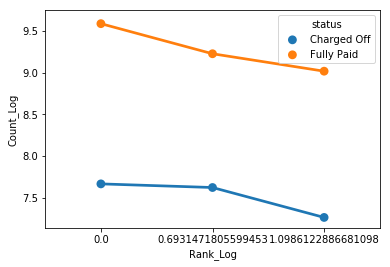

In [153]:
sns.pointplot(x="Rank_Log", y="Count_Log", hue="status", data=df.loc[:,['Rank_Log', 'Count_Log', 'status']])
plt.show()

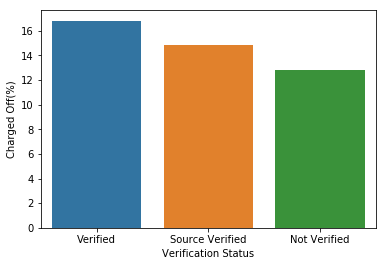

In [154]:
sns.barplot(x="verification_status", y="Charged_Off_Percent", data=verification_status_analysis)\
    .set(ylabel='Charged Off(%)', xlabel='Verification Status')
plt.show()

In [155]:
#Creating graph for Charged off cases according to home ownership
loans_frame['home_ownership'].value_counts(normalize=True)

RENT        0.479042
MORTGAGE    0.441221
OWN         0.077118
OTHER       0.002540
NONE        0.000078
Name: home_ownership, dtype: float64

In [156]:
home_ownership = category_univariate_analysis('home_ownership')
home_ownership

loan_status,home_ownership,Charged Off,Fully Paid,Total,Charged_Off_Percent,Fully_Paid_Percent
2,OTHER,18.0,80.0,98.0,18.367347,81.632653
4,RENT,2839.0,15641.0,18480.0,15.362554,84.637446
3,OWN,443.0,2532.0,2975.0,14.890756,85.109244
0,MORTGAGE,2327.0,14694.0,17021.0,13.671347,86.328653
1,NONE,0.0,3.0,3.0,0.000000,100.000000


In [157]:
df = power_law_df(home_ownership, 'home_ownership')

C:\Users\ArpitSoni\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


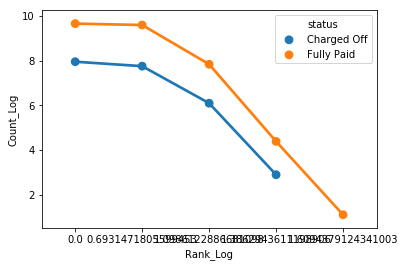

In [158]:
sns.pointplot(x="Rank_Log", y="Count_Log", hue="status", data=df.loc[:,['Rank_Log', 'Count_Log', 'status']])
plt.show()

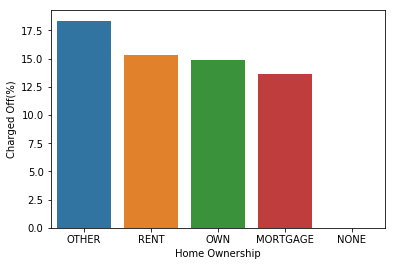

In [159]:
sns.barplot(x="home_ownership", y="Charged_Off_Percent", data=home_ownership)\
    .set(ylabel='Charged Off(%)', xlabel='Home Ownership')
plt.show()

In [160]:
#Creating graph for Charged off cases according to Purpose
loans_frame['purpose'].value_counts(normalize=True)

debt_consolidation    0.468025
credit_card           0.130311
other                 0.100189
home_improvement      0.074526
major_purchase        0.055733
small_business        0.045468
car                   0.038857
wedding               0.024004
medical               0.017653
moving                0.014931
vacation              0.009721
house                 0.009513
educational           0.008425
renewable_energy      0.002644
Name: purpose, dtype: float64

In [161]:
purpose_analysis = category_univariate_analysis('purpose')
purpose_analysis

loan_status,purpose,Charged Off,Fully Paid,Total,Charged_Off_Percent,Fully_Paid_Percent
11,small_business,475,1279,1754,27.080958,72.919042
10,renewable_energy,19,83,102,18.627451,81.372549
3,educational,56,269,325,17.230769,82.769231
9,other,633,3232,3865,16.377749,83.622251
5,house,59,308,367,16.076294,83.923706
8,moving,92,484,576,15.972222,84.027778
7,medical,106,575,681,15.565345,84.434655
2,debt_consolidation,2767,15288,18055,15.325395,84.674605
12,vacation,53,322,375,14.133333,85.866667
4,home_improvement,347,2528,2875,12.069565,87.930435


In [162]:
df = power_law_df(purpose_analysis, 'purpose')

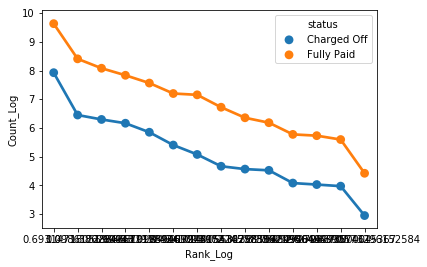

In [163]:
sns.pointplot(x="Rank_Log", y="Count_Log", hue="status", data=df.loc[:,['Rank_Log', 'Count_Log', 'status']])
plt.show()

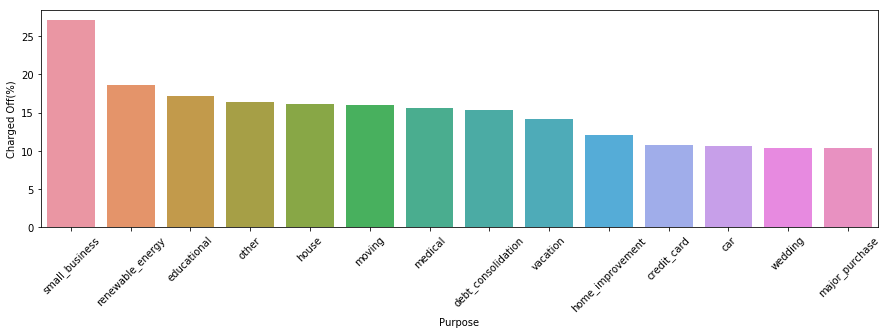

In [164]:
plt.figure(figsize=(15,4))
g = sns.barplot(x="purpose", y="Charged_Off_Percent", data=purpose_analysis)\
    .set(ylabel='Charged Off(%)', xlabel='Purpose')
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.show()

In [165]:
#Creating graph for Charged off cases according to Grade 
loans_frame['grade'].value_counts(normalize=True)

B    0.302641
A    0.260388
C    0.203074
D    0.131814
E    0.069031
F    0.025300
G    0.007751
Name: grade, dtype: float64

In [166]:
grade_analysis = category_univariate_analysis('grade')
grade_analysis

loan_status,grade,Charged Off,Fully Paid,Total,Charged_Off_Percent,Fully_Paid_Percent
6,G,101,198,299,33.779264,66.220736
5,F,319,657,976,32.684426,67.315574
4,E,715,1948,2663,26.849418,73.150582
3,D,1118,3967,5085,21.986234,78.013766
2,C,1347,6487,7834,17.194281,82.805719
1,B,1425,10250,11675,12.205567,87.794433
0,A,602,9443,10045,5.993031,94.006969


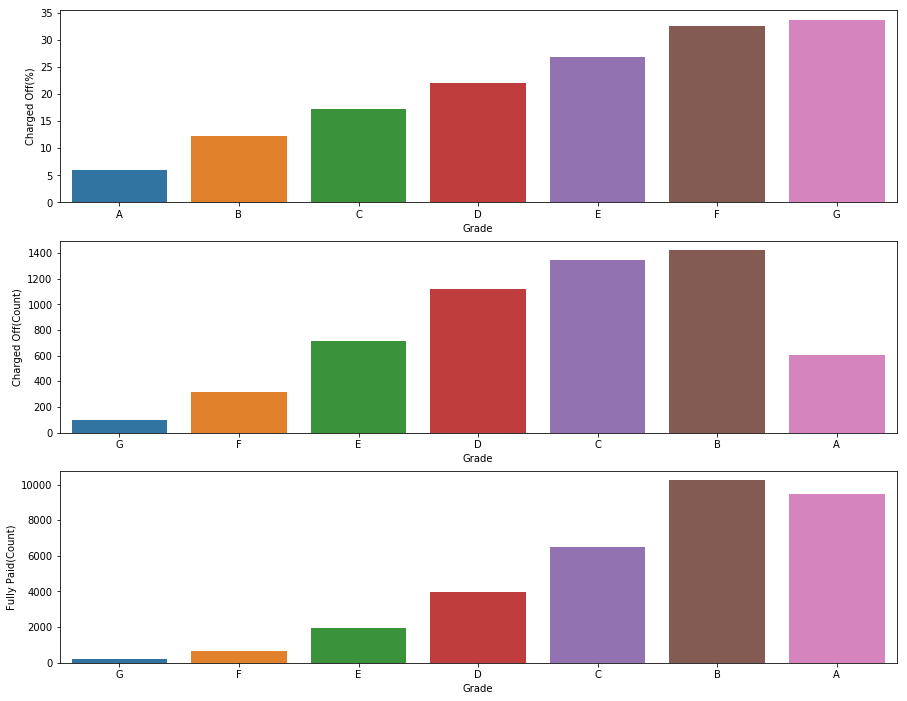

In [167]:
plt.figure(figsize=(15,12))
plt.subplot(3, 1, 1)
g = sns.barplot(x="grade", y="Charged_Off_Percent", data=grade_analysis.sort_values(by='grade'))\
    .set(ylabel='Charged Off(%)', xlabel='Grade')
    
plt.subplot(3, 1, 2)
sns.barplot(x="grade", y="Charged Off", data=grade_analysis)\
    .set(ylabel='Charged Off(Count)', xlabel='Grade')

plt.subplot(3, 1, 3)
sns.barplot(x="grade", y="Fully Paid", data=grade_analysis)\
    .set(ylabel='Fully Paid(Count)', xlabel='Grade')
plt.show()

In [168]:
#Creating graph for Charged off cases according to Employement length
loans_frame['emp_length'].value_counts(normalize=True)

10+ years    0.226081
< 1 year     0.120072
2 years      0.114293
3 years      0.106861
4 years      0.089016
5 years      0.085074
1 year       0.084408
6 years      0.057746
7 years      0.045573
8 years      0.038222
9 years      0.032655
Name: emp_length, dtype: float64

In [169]:
emp_length_analysis = category_univariate_analysis('emp_length')
emp_length_analysis

loan_status,emp_length,Charged Off,Fully Paid,Total,Charged_Off_Percent,Fully_Paid_Percent
1,10+ years,1331,7157,8488,15.680961,84.319039
7,7 years,263,1448,1711,15.371128,84.628872
0,1 year,456,2713,3169,14.389397,85.610603
5,5 years,458,2736,3194,14.339386,85.660614
10,< 1 year,639,3869,4508,14.174800,85.825200
6,6 years,307,1861,2168,14.160517,85.839483
8,8 years,203,1232,1435,14.146341,85.853659
3,3 years,555,3457,4012,13.833500,86.166500
4,4 years,462,2880,3342,13.824057,86.175943
2,2 years,567,3724,4291,13.213703,86.786297


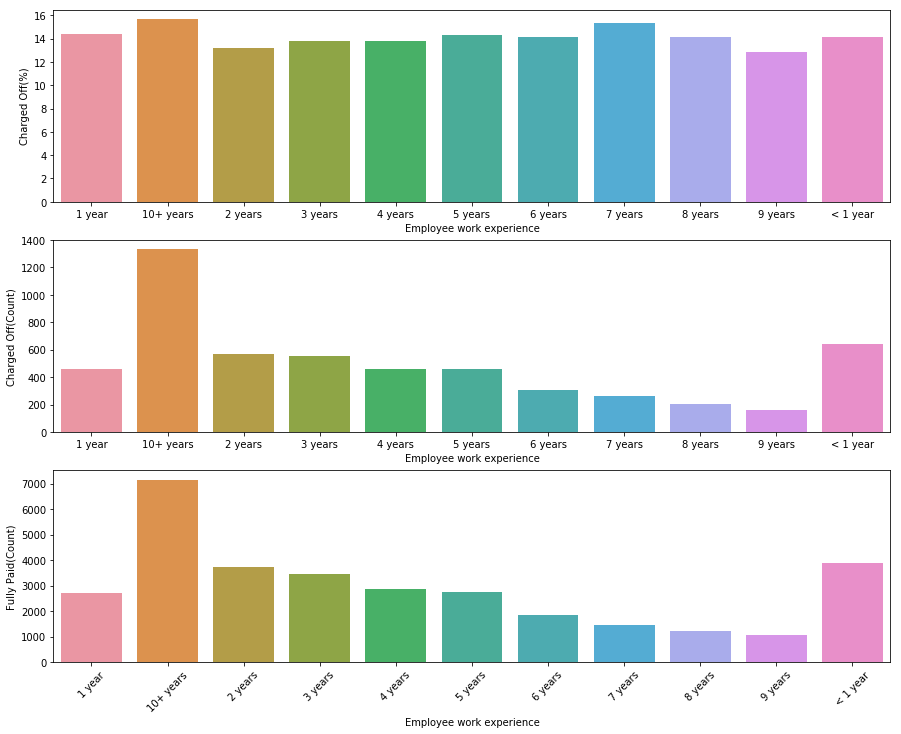

In [170]:
plt.figure(figsize=(15,12))
plt.subplot(3, 1, 1)
sns.barplot(x="emp_length", y="Charged_Off_Percent", data=emp_length_analysis.sort_values(by='emp_length'))\
    .set(ylabel='Charged Off(%)', xlabel='Employee work experience')
    
plt.subplot(3, 1, 2)
sns.barplot(x="emp_length", y="Charged Off", data=emp_length_analysis.sort_values(by='emp_length'))\
    .set(ylabel='Charged Off(Count)', xlabel='Employee work experience')

plt.subplot(3, 1, 3)
sns.barplot(x="emp_length", y="Fully Paid", data=emp_length_analysis.sort_values(by='emp_length'))\
    .set(ylabel='Fully Paid(Count)', xlabel='Employee work experience')
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.show()

In [171]:
#Creating graph for Charged off cases according to Term
loans_frame['term'].value_counts(normalize=True)

 36 months    0.754232
 60 months    0.245768
Name: term, dtype: float64

In [172]:
term_analysis = category_univariate_analysis('term')
term_analysis

loan_status,term,Charged Off,Fully Paid,Total,Charged_Off_Percent,Fully_Paid_Percent
1,60 months,2400,7081,9481,25.313785,74.686215
0,36 months,3227,25869,29096,11.090872,88.909128


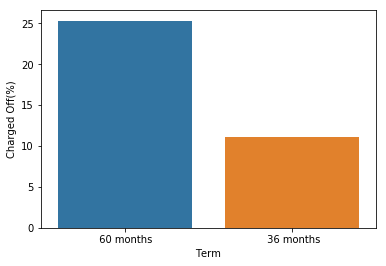

In [173]:
g = sns.barplot(x="term", y="Charged_Off_Percent", data=term_analysis)\
    .set(ylabel='Charged Off(%)', xlabel='Term')
plt.show()

In [174]:
#Creating graph for Charged off cases according to Add State
loans_frame['addr_state'].value_counts(normalize=True)

CA    0.180133
NY    0.095860
FL    0.072090
TX    0.068927
NJ    0.046401
IL    0.038313
PA    0.038054
VA    0.035487
GA    0.035228
MA    0.033621
OH    0.030536
MD    0.026518
AZ    0.022008
WA    0.021204
CO    0.019856
NC    0.019442
CT    0.018820
MI    0.018249
MO    0.017368
MN    0.015683
NV    0.012417
SC    0.011898
WI    0.011406
AL    0.011276
OR    0.011276
LA    0.011069
KY    0.008062
OK    0.007440
KS    0.006610
UT    0.006532
AR    0.006092
DC    0.005470
RI    0.005029
NM    0.004744
WV    0.004459
HI    0.004303
NH    0.004303
DE    0.002929
MT    0.002152
WY    0.002074
AK    0.002022
SD    0.001607
VT    0.001374
MS    0.000493
TN    0.000441
IN    0.000233
ID    0.000156
IA    0.000130
NE    0.000130
ME    0.000078
Name: addr_state, dtype: float64

In [175]:
addr_state_analysis = category_univariate_analysis('addr_state')
addr_state_analysis.head(5)

loan_status,addr_state,Charged Off,Fully Paid,Total,Charged_Off_Percent,Fully_Paid_Percent
28,NE,3.0,2.0,5.0,60.000000,40.000000
32,NV,108.0,371.0,479.0,22.546973,77.453027
40,SD,12.0,50.0,62.0,19.354839,80.645161
0,AK,15.0,63.0,78.0,19.230769,80.769231
9,FL,504.0,2277.0,2781.0,18.122977,81.877023


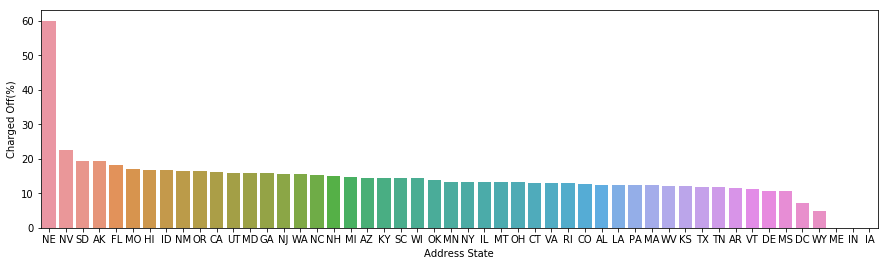

In [176]:
plt.figure(figsize=(15,4))
g = sns.barplot(x="addr_state", y="Charged_Off_Percent", data=addr_state_analysis)\
    .set(ylabel='Charged Off(%)', xlabel='Address State')
plt.show()

#### Quatitative variable univariate analysis

In [177]:
loans_frame['revol_util'] = loans_frame['revol_util'].astype('str')
loans_frame['revol_util'] = loans_frame['revol_util'].map(lambda x : x.rstrip('%'))
loans_frame['revol_util'] = loans_frame['revol_util'].astype('float')
bins=[0,10,20,30,40,50,60,70,80,90,100]
pd.cut(loans_frame.loc[loans_frame['loan_status'] == 'Charged Off','revol_util'], bins=bins).value_counts(normalize=True)

(70, 80]     0.127492
(80, 90]     0.124017
(60, 70]     0.120541
(90, 100]    0.119993
(50, 60]     0.115237
(40, 50]     0.110847
(30, 40]     0.091641
(20, 30]     0.075727
(10, 20]     0.060911
(0, 10]      0.053594
Name: revol_util, dtype: float64

In [178]:
loans_frame['revol_util'] = loans_frame['revol_util'].astype('str')
loans_frame['revol_util'] = loans_frame['revol_util'].map(lambda x : x.rstrip('%'))
loans_frame['revol_util'] = loans_frame['revol_util'].astype('float')
bins=[0,10,20,30,40,50,60,70,80,90,100]
pd.cut(loans_frame.loc[loans_frame['loan_status'] == 'Fully Paid','revol_util'], bins=bins).value_counts(normalize=True)

(40, 50]     0.112689
(50, 60]     0.110696
(30, 40]     0.109014
(60, 70]     0.107706
(20, 30]     0.102473
(70, 80]     0.099670
(0, 10]      0.099296
(10, 20]     0.093191
(80, 90]     0.089921
(90, 100]    0.075344
Name: revol_util, dtype: float64

In [179]:
loans_frame.loc[loans_frame['loan_status'] == 'Charged Off','revol_bal'].describe()

count      5627.000000
mean      13514.243647
std       15164.117475
min           0.000000
25%        3968.000000
50%        9211.000000
75%       17518.000000
max      148829.000000
Name: revol_bal, dtype: float64

In [180]:
loans_frame.loc[loans_frame['loan_status'] == 'Fully Paid','revol_bal'].describe()

count     32950.000000
mean      13251.107739
std       15983.260153
min           0.000000
25%        3603.000000
50%        8682.500000
75%       16804.750000
max      149588.000000
Name: revol_bal, dtype: float64

In [181]:
loans_frame.loc[loans_frame['loan_status'] == 'Charged Off','dti'].describe()

count    5627.000000
mean       14.000624
std         6.585577
min         0.000000
25%         9.050000
50%        14.290000
75%        19.290000
max        29.850000
Name: dti, dtype: float64

In [182]:
loans_frame.loc[loans_frame['loan_status'] == 'Fully Paid','dti'].describe()

count    32950.000000
mean        13.148421
std          6.680041
min          0.000000
25%          7.980000
50%         13.200000
75%         18.390000
max         29.990000
Name: dti, dtype: float64

In [183]:
loans_frame.loc[loans_frame['loan_status'] == 'Charged Off','open_acc'].describe()

count    5627.000000
mean        9.178070
std         4.525937
min         2.000000
25%         6.000000
50%         8.000000
75%        12.000000
max        38.000000
Name: open_acc, dtype: float64

In [184]:
loans_frame.loc[loans_frame['loan_status'] == 'Fully Paid','open_acc'].describe()

count    32950.000000
mean         9.292049
std          4.379854
min          2.000000
25%          6.000000
50%          9.000000
75%         12.000000
max         44.000000
Name: open_acc, dtype: float64

In [185]:
loans_frame.loc[loans_frame['loan_status'] == 'Charged Off','total_acc'].describe()

count    5627.000000
mean       21.427581
std        11.447427
min         2.000000
25%        13.000000
50%        20.000000
75%        28.000000
max        74.000000
Name: total_acc, dtype: float64

In [186]:
loans_frame.loc[loans_frame['loan_status'] == 'Fully Paid','total_acc'].describe()

count    32950.000000
mean        22.159393
std         11.418927
min          2.000000
25%         14.000000
50%         20.000000
75%         29.000000
max         90.000000
Name: total_acc, dtype: float64

In [187]:
loans_frame.shape

(38577, 41)

## Bivariate Analysis
##### Let see co relation between columns with charged off and fully paid customers. 

In [188]:
loans_frame.head()

,addr_state,annual_inc,collection_recovery_fee,delinq_2yrs,dti,earliest_cr_line,emp_length,funded_amnt,funded_amnt_inv,grade,home_ownership,id,inq_last_6mths,installment,int_rate,issue_d,last_credit_pull_d,last_pymnt_amnt,last_pymnt_d,loan_amnt,loan_status,member_id,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,pub_rec_bankruptcies,purpose,recoveries,revol_bal,revol_util,sub_grade,term,total_acc,total_pymnt,total_pymnt_inv,total_rec_int,total_rec_late_fee,total_rec_prncp,verification_status,zip_code
0,AZ,24000.0,0.00,0,27.65,Jan-85,10+ years,5000,4975.0,B,RENT,1077501,1,162.87,10.65%,Dec-11,May-16,171.62,Jan-15,5000,Fully Paid,1296599,NaN,NaN,3,0,0.0,credit_card,0.00,13648,83.7,B2,36 months,9,5863.155187,5833.84,863.16,0.00,5000.00,Verified,860xx
1,GA,30000.0,1.11,0,1.00,Apr-99,< 1 year,2500,2500.0,C,RENT,1077430,5,59.83,15.27%,Dec-11,Sep-13,119.66,Apr-13,2500,Charged Off,1314167,NaN,NaN,3,0,0.0,car,117.08,1687,9.4,C4,60 months,4,1008.710000,1008.71,435.17,0.00,456.46,Source Verified,309xx
2,IL,12252.0,0.00,0,8.72,Nov-01,10+ years,2400,2400.0,C,RENT,1077175,2,84.33,15.96%,Dec-11,May-16,649.91,Jun-14,2400,Fully Paid,1313524,NaN,NaN,2,0,0.0,small_business,0.00,2956,98.5,C5,36 months,10,3005.666844,3005.67,605.67,0.00,2400.00,Not Verified,606xx
3,CA,49200.0,0.00,0,20.00,Feb-96,10+ years,10000,10000.0,C,RENT,1076863,1,339.31,13.49%,Dec-11,Apr-16,357.48,Jan-15,10000,Fully Paid,1277178,35.0,NaN,10,0,0.0,other,0.00,5598,21.0,C1,36 months,37,12231.890000,12231.89,2214.92,16.97,10000.00,Source Verified,917xx
5,AZ,36000.0,0.00,0,11.20,Nov-04,3 years,5000,5000.0,A,RENT,1075269,3,156.46,7.90%,Dec-11,Jan-16,161.03,Jan-15,5000,Fully Paid,1311441,NaN,NaN,9,0,0.0,wedding,0.00,7963,28.3,A4,36 months,12,5632.210000,5632.21,632.21,0.00,5000.00,Source Verified,852xx


In [189]:
# Remove % from int_rate for performing co relation
loans_frame['int_rate'] = loans_frame['int_rate'].apply(lambda x: float(x.split('%')[0]))
loans_frame.head()

,addr_state,annual_inc,collection_recovery_fee,delinq_2yrs,dti,earliest_cr_line,emp_length,funded_amnt,funded_amnt_inv,grade,home_ownership,id,inq_last_6mths,installment,int_rate,issue_d,last_credit_pull_d,last_pymnt_amnt,last_pymnt_d,loan_amnt,loan_status,member_id,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,pub_rec_bankruptcies,purpose,recoveries,revol_bal,revol_util,sub_grade,term,total_acc,total_pymnt,total_pymnt_inv,total_rec_int,total_rec_late_fee,total_rec_prncp,verification_status,zip_code
0,AZ,24000.0,0.00,0,27.65,Jan-85,10+ years,5000,4975.0,B,RENT,1077501,1,162.87,10.65,Dec-11,May-16,171.62,Jan-15,5000,Fully Paid,1296599,NaN,NaN,3,0,0.0,credit_card,0.00,13648,83.7,B2,36 months,9,5863.155187,5833.84,863.16,0.00,5000.00,Verified,860xx
1,GA,30000.0,1.11,0,1.00,Apr-99,< 1 year,2500,2500.0,C,RENT,1077430,5,59.83,15.27,Dec-11,Sep-13,119.66,Apr-13,2500,Charged Off,1314167,NaN,NaN,3,0,0.0,car,117.08,1687,9.4,C4,60 months,4,1008.710000,1008.71,435.17,0.00,456.46,Source Verified,309xx
2,IL,12252.0,0.00,0,8.72,Nov-01,10+ years,2400,2400.0,C,RENT,1077175,2,84.33,15.96,Dec-11,May-16,649.91,Jun-14,2400,Fully Paid,1313524,NaN,NaN,2,0,0.0,small_business,0.00,2956,98.5,C5,36 months,10,3005.666844,3005.67,605.67,0.00,2400.00,Not Verified,606xx
3,CA,49200.0,0.00,0,20.00,Feb-96,10+ years,10000,10000.0,C,RENT,1076863,1,339.31,13.49,Dec-11,Apr-16,357.48,Jan-15,10000,Fully Paid,1277178,35.0,NaN,10,0,0.0,other,0.00,5598,21.0,C1,36 months,37,12231.890000,12231.89,2214.92,16.97,10000.00,Source Verified,917xx
5,AZ,36000.0,0.00,0,11.20,Nov-04,3 years,5000,5000.0,A,RENT,1075269,3,156.46,7.90,Dec-11,Jan-16,161.03,Jan-15,5000,Fully Paid,1311441,NaN,NaN,9,0,0.0,wedding,0.00,7963,28.3,A4,36 months,12,5632.210000,5632.21,632.21,0.00,5000.00,Source Verified,852xx


In [190]:
# Function to drive a column named charged_off with 1 stating as customer charged off and 0 stating as customer not charged off
def addChargedOff(row):
    if(row['loan_status'] == 'Charged Off'):
        val = 1
    else :
        val = 0
    return val

# Function to drive a column named fully_paid with 1 stating as customer fully paid loan and 0 stating as customer not fully paid
def addFullyPaid(row):
    if(row['loan_status'] == 'Fully Paid'):
        val = 1
    else :
        val = 0
    return val
        
    

In [191]:
# Adding columns with the name of charged_off and fully_paid
loans_frame_without_current = loans_frame.loc[loans_frame['loan_status'] != 'Current']
loans_frame_without_current['charged_off'] = loans_frame_without_current.apply(addChargedOff,axis = 1)
loans_frame_without_current['fully_paid'] = loans_frame_without_current.apply(addFullyPaid, axis = 1)
loans_frame_without_current.head()

,addr_state,annual_inc,collection_recovery_fee,delinq_2yrs,dti,earliest_cr_line,emp_length,funded_amnt,funded_amnt_inv,grade,home_ownership,id,inq_last_6mths,installment,int_rate,issue_d,last_credit_pull_d,last_pymnt_amnt,last_pymnt_d,loan_amnt,loan_status,member_id,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,pub_rec_bankruptcies,purpose,recoveries,revol_bal,revol_util,sub_grade,term,total_acc,total_pymnt,total_pymnt_inv,total_rec_int,total_rec_late_fee,total_rec_prncp,verification_status,zip_code,charged_off,fully_paid
0,AZ,24000.0,0.00,0,27.65,Jan-85,10+ years,5000,4975.0,B,RENT,1077501,1,162.87,10.65,Dec-11,May-16,171.62,Jan-15,5000,Fully Paid,1296599,NaN,NaN,3,0,0.0,credit_card,0.00,13648,83.7,B2,36 months,9,5863.155187,5833.84,863.16,0.00,5000.00,Verified,860xx,0,1
1,GA,30000.0,1.11,0,1.00,Apr-99,< 1 year,2500,2500.0,C,RENT,1077430,5,59.83,15.27,Dec-11,Sep-13,119.66,Apr-13,2500,Charged Off,1314167,NaN,NaN,3,0,0.0,car,117.08,1687,9.4,C4,60 months,4,1008.710000,1008.71,435.17,0.00,456.46,Source Verified,309xx,1,0
2,IL,12252.0,0.00,0,8.72,Nov-01,10+ years,2400,2400.0,C,RENT,1077175,2,84.33,15.96,Dec-11,May-16,649.91,Jun-14,2400,Fully Paid,1313524,NaN,NaN,2,0,0.0,small_business,0.00,2956,98.5,C5,36 months,10,3005.666844,3005.67,605.67,0.00,2400.00,Not Verified,606xx,0,1
3,CA,49200.0,0.00,0,20.00,Feb-96,10+ years,10000,10000.0,C,RENT,1076863,1,339.31,13.49,Dec-11,Apr-16,357.48,Jan-15,10000,Fully Paid,1277178,35.0,NaN,10,0,0.0,other,0.00,5598,21.0,C1,36 months,37,12231.890000,12231.89,2214.92,16.97,10000.00,Source Verified,917xx,0,1
5,AZ,36000.0,0.00,0,11.20,Nov-04,3 years,5000,5000.0,A,RENT,1075269,3,156.46,7.90,Dec-11,Jan-16,161.03,Jan-15,5000,Fully Paid,1311441,NaN,NaN,9,0,0.0,wedding,0.00,7963,28.3,A4,36 months,12,5632.210000,5632.21,632.21,0.00,5000.00,Source Verified,852xx,0,1


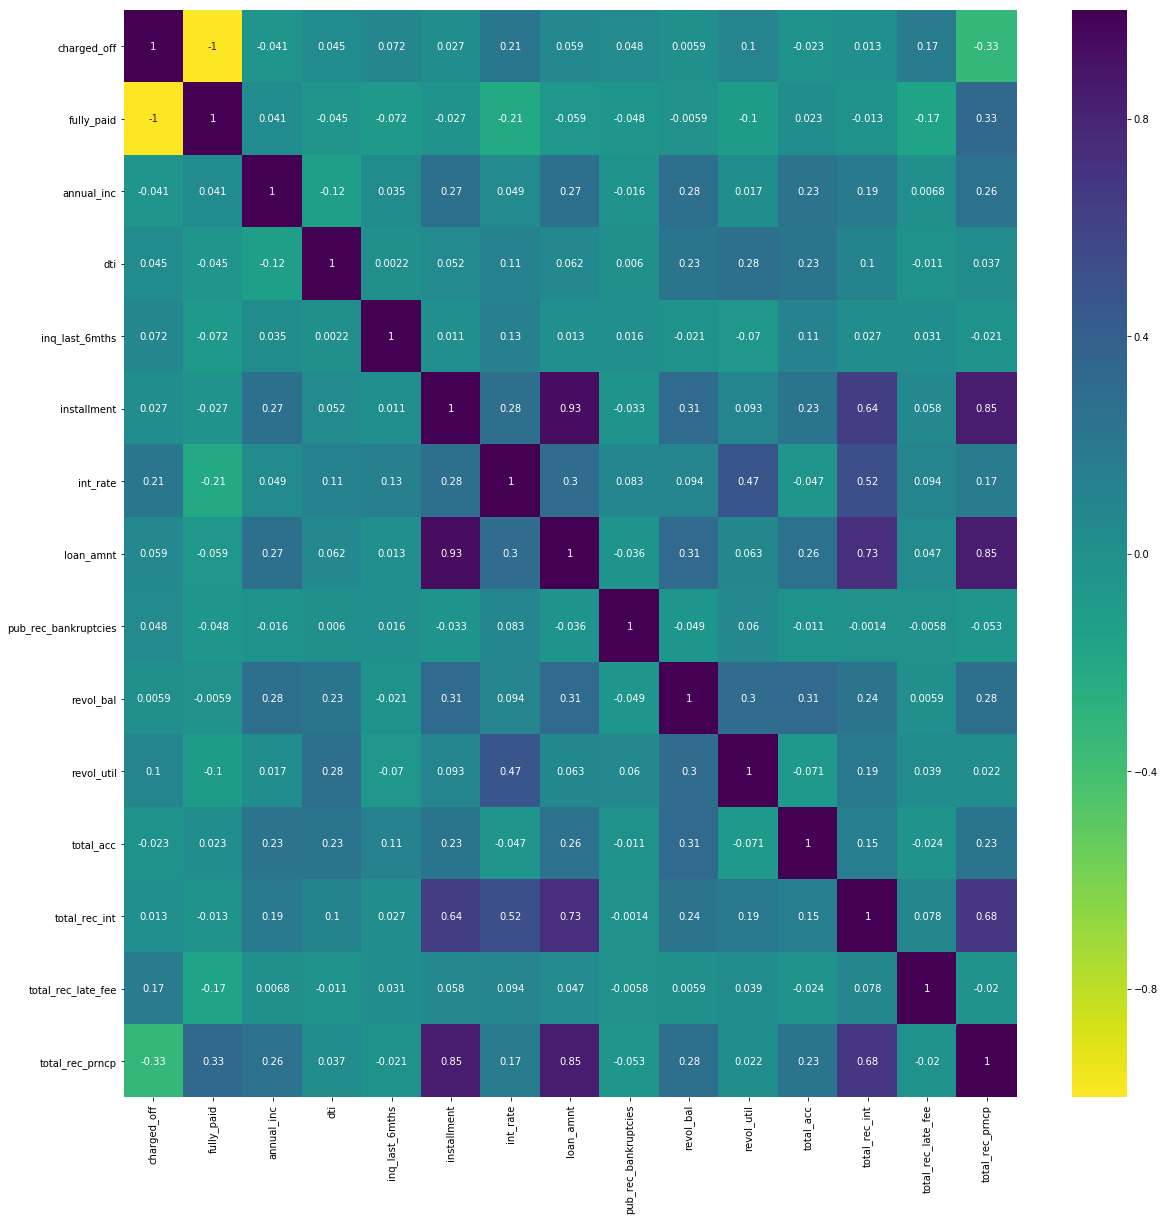

In [192]:
# Drawing heatmap to see pattern of corelation effecting loan getting default or fully paid
loans_frame_without_current = loans_frame_without_current[['charged_off','fully_paid','annual_inc','dti','inq_last_6mths','installment','int_rate','loan_amnt','pub_rec_bankruptcies','revol_bal','revol_util','total_acc','total_rec_int','total_rec_late_fee','total_rec_prncp']].copy()
plt.figure(figsize = (20,20))
sns.heatmap(loans_frame_without_current.corr(),annot=True,cmap='viridis_r')
plt.show()

## Conclusion:
Above trend shows co relation between fully paid and Charged off, where the negative means decrease in attribute value increase the probability of the event and positve means increase in attribute value increase the probability of the event.

###### Below are reasons for probability of loan getting default / charged off
###### Low Annual Income
###### High installments
###### High interest rate
###### High Loan amount 


These above variables most probably influences loan success / unsuccess.
